# Load data from csv files

In [55]:
import pandas as pd

# burned_area = pd.read_excel('burn_data.xlsx', sheetname='Burned_Area')
# temperature = pd.read_excel('burn_data.xlsx', sheetname='Temperature')
# leaf_area = pd.read_excel('burn_data.xlsx', sheetname='Leaf_Area')

In [134]:
# Merge three csv files according to the column of 'system:index'
# 1. Merge "temperature" and "leaf_area" into temp_leaf by inner_join
# 2. Merge "burn_area" and temp_leaf into burned_temp_leaf by right_join
# If a csv file doesn't have matched 'system:index' value, the field value is 'nan'
# Reference link: https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
# temp_leaf = pd.merge(left=temperature, right=leaf_area, left_on='system:index', right_on='system:index') 
# burned_temp_leaf = pd.merge(left=burned_area, right=temp_leaf, how='right', left_on='system:index', right_on='system:index')
# print(burned_temp_leaf.columns)
burned_temp_leaf = pd.read_excel('../data/all_training_data.xlsx')
# burned_temp_leaf = pd.read_excel('burned_temp_leaf.xlsx')
#print(btl)

In [135]:
#burned_temp_leaf.to_excel('burned_temp_leaf.xlsx')

In [136]:
# Fill in 100 for the uncertainty of date has no fire
y = burned_temp_leaf['Uncertainty'].fillna(100).values.tolist()

# Prune the unuseful columns
del burned_temp_leaf['system:index']
del burned_temp_leaf['BurnDate']
del burned_temp_leaf['FirstDay']
del burned_temp_leaf['LastDay']
del burned_temp_leaf['QA']
del burned_temp_leaf['Uncertainty']

# del burned_temp_leaf['ppt']   # No contribution
# del burned_temp_leaf['tdmean'] # No contribution
# #del burned_temp_leaf['tmax']
# del burned_temp_leaf['tmean']  # Degrade
# del burned_temp_leaf['tmin']   # Degrade

#del burned_temp_leaf['vpdmax']
# del burned_temp_leaf['vpdmin'] # Degrade
del burned_temp_leaf['Fpar'] # No contribution
#del burned_temp_leaf['FparExtra_QC'] # No contribution
del burned_temp_leaf['FparLai_QC'] # No contribution
del burned_temp_leaf['FparStdDev'] # No contribution
del burned_temp_leaf['Lai'] # No contribution
#del burned_temp_leaf['LaiStdDev']

del burned_temp_leaf['.geo']


X = burned_temp_leaf.values.tolist()

In [137]:
from sklearn.model_selection import train_test_split
X_fire = X[:1064]
y_fire = y[:1064]
X_nofire = X[1064:]
y_nofire = y[1064:]
X_fire_train, X_fire_test, y_fire_train, y_fire_test = train_test_split(X_fire, y_fire, test_size=0.25, random_state=42)
X_nofire_train, X_nofire_test, y_nofire_train, y_nofire_test = train_test_split(X_nofire, y_nofire, test_size=0.10, random_state=42)
# print(X_fire)
# print(y_fire)

# Regression

In [130]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=50000)
lr = lr.fit(X_fire_train, y_fire_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [131]:
y_fire_pred = lr.predict(X_fire_test)
#y_nofire_pred = lr.predict(X_nofire_test)

In [132]:
import numpy as np
print(np.mean(y_fire_pred == y_fire_test))
#print(np.mean(y_nofire_pred == y_nofire_test))
#print(y_fire_pred)
#print(y_fire_test)

0.3458646616541353


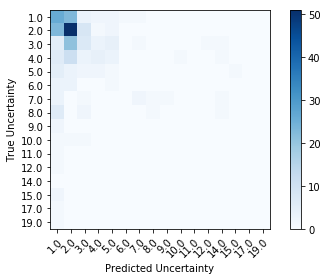

In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_fire_test, y_fire_pred)

# Only uses the labels that appear in the data
labels = unique_labels(y_fire_test, y_fire_pred)
#print(cm)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           ylabel='True Uncertainty',
           xlabel='Predicted Uncertainty')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.tight_layout()